In [1]:
import sys
sys.path.append('/notebooks/MOD2NN')

In [2]:
import os
import json
import glob
import re

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

from CNN.module.lib.layers import *
from Faraday.two_dim.module.lib.layers import *

from Faraday.two_dim import matplotlib_style
matplotlib_style.paper()

tf.random.set_seed(1)

print("TensorFlow:", tf.__version__)
print("Python:", sys.version)

plt.rcParams['font.size'] = 18

TensorFlow: 2.9.1
Python: 3.9.13 (main, May 23 2022, 22:01:06) 
[GCC 9.4.0]


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.sqrt(x_train.astype("float32") / 255.0)
x_test = np.sqrt(x_test.astype("float32") / 255.0)

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

11490434/11490434 [==============================] - 0s 0us/step


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


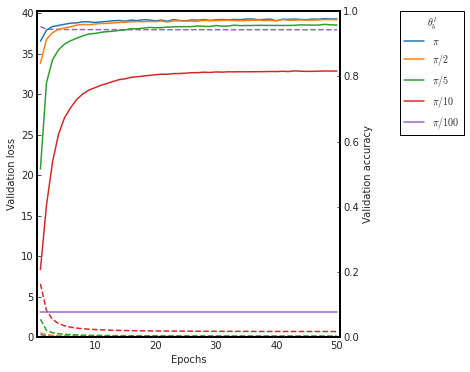

In [23]:
path = "trained_model/20230110/intens/*"
files = glob.glob(path)
files.sort()
files

matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

theta = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
labels = [r"$\pi$", r"$\pi /2$", r"$\pi /5$", r"$\pi /10$", r"$\pi /100$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")
plt.savefig("images/paper/intens_result.png", bbox_inches='tight', dpi=300)

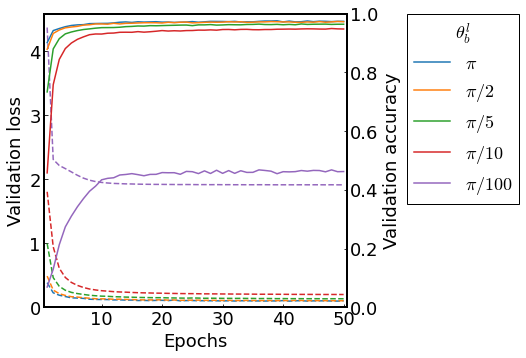

In [148]:
path = "trained_model/20230110/intens_pol/*"
files = glob.glob(path)
files.sort()

matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

theta = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
labels = [r"$\pi$", r"$\pi /2$", r"$\pi /5$", r"$\pi /10$", r"$\pi /100$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")
plt.savefig("images/paper/intens_pol_result.png", bbox_inches='tight', dpi=300)

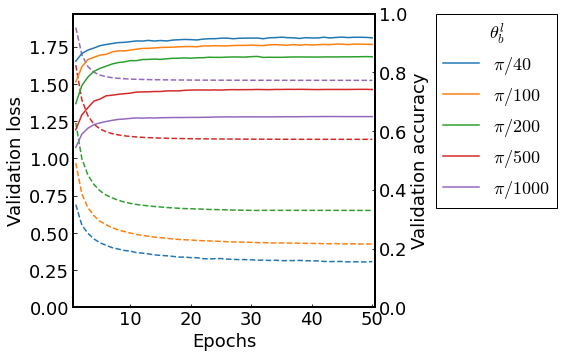

In [149]:
path = "trained_model/20230110/angle/*"
files = glob.glob(path)
files.sort()

matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

theta = [np.pi/40, np.pi/100., np.pi/200., np.pi/500., np.pi/1000]
labels = [r"$\pi/40$", r"$\pi /100$", r"$\pi /200$", r"$\pi /500$", r"$\pi /1000$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")
plt.savefig("images/paper/angle_result.png", bbox_inches='tight', dpi=300)

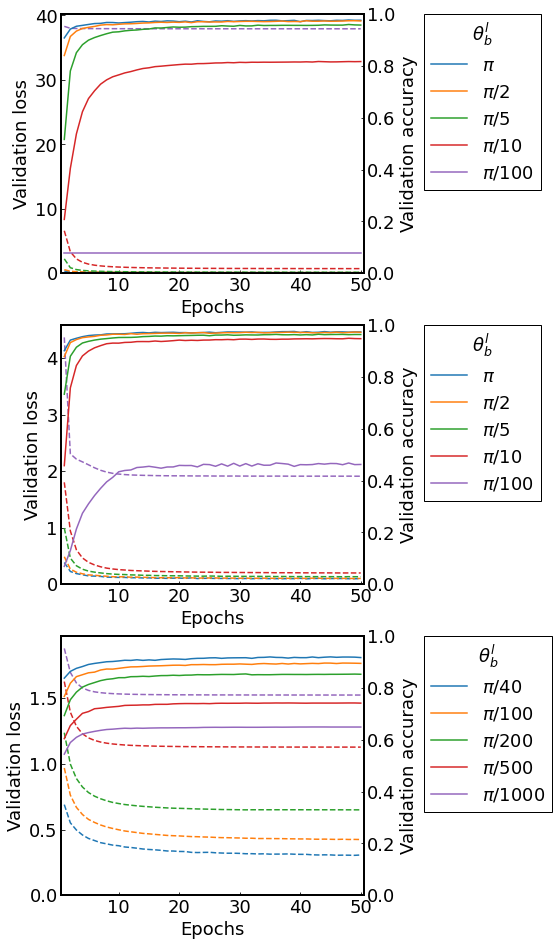

In [76]:
path = "trained_model/20230110/intens/*"
files = glob.glob(path)
files.sort()
files

matplotlib_style.paper()

fig = plt.figure(figsize=(6,18))
ax1 = fig.add_subplot(311)
ax2 = ax1.twinx()

theta = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
labels = [r"$\pi$", r"$\pi /2$", r"$\pi /5$", r"$\pi /10$", r"$\pi /100$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")

#-----------------------------------------------------------------------------#

path = "trained_model/20230110/intens_pol/*"
files = glob.glob(path)
files.sort()

ax1 = fig.add_subplot(312)
ax2 = ax1.twinx()

theta = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
labels = [r"$\pi$", r"$\pi /2$", r"$\pi /5$", r"$\pi /10$", r"$\pi /100$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")

#-----------------------------------------------------------------------------#

path = "trained_model/20230110/angle/*"
files = glob.glob(path)
files.sort()

ax1 = fig.add_subplot(313)
ax2 = ax1.twinx()

theta = [np.pi/40, np.pi/100., np.pi/200., np.pi/500., np.pi/1000]
labels = [r"$\pi/40$", r"$\pi /100$", r"$\pi /200$", r"$\pi /500$", r"$\pi /1000$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")
plt.savefig("images/paper/total_result.png", bbox_inches='tight', dpi=300)

In [ ]:
path = "trained_model/20230110/intens/*"
files = glob.glob(path)
files.sort()
files

matplotlib_style.paper()

fig = plt.figure(figsize=(6,18))
ax1 = fig.add_subplot(311)
ax2 = ax1.twinx()

theta = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
labels = [r"$\pi$", r"$\pi /2$", r"$\pi /5$", r"$\pi /10$", r"$\pi /100$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")

#-----------------------------------------------------------------------------#

path = "trained_model/20230110/intens_pol/*"
files = glob.glob(path)
files.sort()

ax1 = fig.add_subplot(312)
ax2 = ax1.twinx()

theta = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
labels = [r"$\pi$", r"$\pi /2$", r"$\pi /5$", r"$\pi /10$", r"$\pi /100$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")

#-----------------------------------------------------------------------------#

path = "trained_model/20230110/angle/*"
files = glob.glob(path)
files.sort()

ax1 = fig.add_subplot(313)
ax2 = ax1.twinx()

theta = [np.pi/40, np.pi/100., np.pi/200., np.pi/500., np.pi/1000]
labels = [r"$\pi/40$", r"$\pi /100$", r"$\pi /200$", r"$\pi /500$", r"$\pi /1000$"]

for i, f in enumerate(files):
    df = pd.read_csv(f + "/history.csv")
    epochs = np.arange(len(df["val_loss"])) + 1
    ax1.plot(epochs, df["val_loss"], ls="--")
    ax2.plot(epochs, df["val_accuracy"],  label=labels[i])


ax1.set_xlabel("Epochs")
ax1.set_ylabel("Validation loss")
ax1.set_ylim(0, max(df["val_loss"])*1.05)

ax2.set_ylabel("Validation accuracy")
ax2.set_ylim(0,1)
legend = ax2.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)
legend.set_title(r"$\theta_b^l$")
plt.savefig("images/paper/total_result.png", bbox_inches='tight', dpi=300)

In [86]:
path = "trained_model/20230110/intens/*"
files = glob.glob(path)
files.sort()

test_eval = []
for f in files:
    model = tf.keras.models.load_model(f)
    eval = model.evaluate(x_test, y_test)
    test_eval.append(eval)

df = pd.DataFrame(test_eval, columns=["test_loss", "test_accuracy"])
df.to_csv("out/paper/intens_result.csv", index=False)

313/313 [==============================] - 5s 14ms/step - loss: 40.0668 - accuracy: 0.0845


In [93]:
path = "trained_model/20230110/intens_pol/*"
files = glob.glob(path)
files.sort()

test_eval = []
for f in files:
    model = tf.keras.models.load_model(f)
    eval = model.evaluate(x_test, y_test)
    test_eval.append(eval)

df = pd.DataFrame(test_eval, columns=["test_loss", "test_accuracy"])
df.to_csv("out/paper/intens_pol_result.csv", index=False)

313/313 [==============================] - 5s 14ms/step - loss: 1.9455 - accuracy: 0.4169


In [94]:
path = "trained_model/20230110/angle/*"
files = glob.glob(path)
files.sort()

test_eval = []
for f in files:
    model = tf.keras.models.load_model(f)
    eval = model.evaluate(x_test, y_test)
    test_eval.append(eval)

df = pd.DataFrame(test_eval, columns=["test_loss", "test_accuracy"])
df.to_csv("out/paper/angle_result.csv", index=False)

313/313 [==============================] - 5s 15ms/step - loss: 1.5558 - accuracy: 0.6163


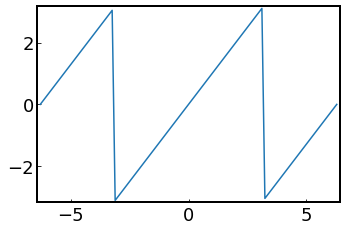

In [142]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
plt.plot(x, (x + np.pi)%(2*np.pi) - np.pi)

/tmp/ipykernel_32/3107328058.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


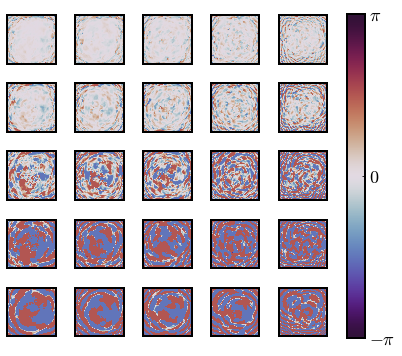

In [143]:
matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"

path = "trained_model/20230110/intens/*"
files = glob.glob(path)
files.sort()

fig, axes = plt.subplots(5,5, figsize=(5,5))

theta_b = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
for i, f in enumerate(files):
    model = tf.keras.models.load_model(f)
    w = model.get_weights()
    for j in range(5):
        if (i == 0) & (j == 4):
            image = axes[i, j].imshow(w[j], cmap="twilight_shifted", vmax=np.pi, vmin=-np.pi)
            cax = fig.add_axes([1.0, 0.05, 0.05, 0.9])
            cbar = fig.colorbar(image, cax=cax)
            cbar.set_ticks([-np.pi, 0, np.pi])
            cbar.set_ticklabels([r"$-\pi$", "$0$", r"$\pi$"])
        else:
            axes[i, j].imshow((w[j] + np.pi) % (2*np.pi) - np.pi, cmap="twilight_shifted", vmax=np.pi, vmin=-np.pi)

for _ax in axes:
    for ax in _ax:
        ax.set_xticks([],[])
        ax.set_yticks([],[])

fig.tight_layout()
fig.savefig("images/paper/intens_weights.png", dpi=300, bbox_inches='tight')

/tmp/ipykernel_32/4085719877.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


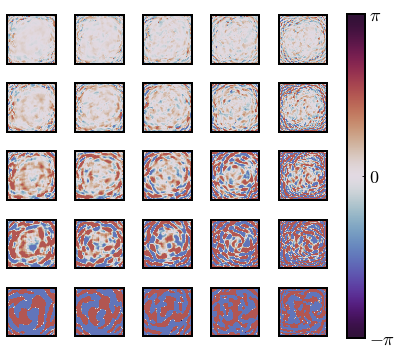

In [144]:
matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"

path = "trained_model/20230110/intens_pol/*"
files = glob.glob(path)
files.sort()

fig, axes = plt.subplots(5,5, figsize=(5,5))

theta_b = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
for i, f in enumerate(files):
    model = tf.keras.models.load_model(f)
    w = model.get_weights()
    for j in range(5):
        if (i == 0) & (j == 4):
            image = axes[i, j].imshow(w[j], cmap="twilight_shifted", vmax=np.pi, vmin=-np.pi)
            cax = fig.add_axes([1.0, 0.05, 0.05, 0.9])
            cbar = fig.colorbar(image, cax=cax)
            cbar.set_ticks([-np.pi, 0, np.pi])
            cbar.set_ticklabels([r"$-\pi$", "$0$", r"$\pi$"])
        else:
            axes[i, j].imshow((w[j] + np.pi) % (2*np.pi) - np.pi, cmap="twilight_shifted", vmax=np.pi, vmin=-np.pi)

for _ax in axes:
    for ax in _ax:
        ax.set_xticks([],[])
        ax.set_yticks([],[])

fig.tight_layout()
fig.savefig("images/paper/intens_pol_weights.png", dpi=300, bbox_inches='tight')

/tmp/ipykernel_32/3213694689.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


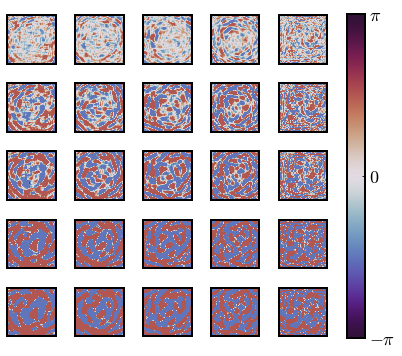

In [145]:
matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"

path = "trained_model/20230110/angle/*"
files = glob.glob(path)
files.sort()

fig, axes = plt.subplots(5,5, figsize=(5,5))

theta_b = [np.pi, np.pi/2., np.pi/5., np.pi/10., np.pi/100]
for i, f in enumerate(files):
    model = tf.keras.models.load_model(f)
    w = model.get_weights()
    for j in range(5):
        if (i == 0) & (j == 4):
            image = axes[i, j].imshow(w[j], cmap="twilight_shifted", vmax=np.pi, vmin=-np.pi)
            cax = fig.add_axes([1.0, 0.05, 0.05, 0.9])
            cbar = fig.colorbar(image, cax=cax)
            cbar.set_ticks([-np.pi, 0, np.pi])
            cbar.set_ticklabels([r"$-\pi$", "$0$", r"$\pi$"])
        else:
            axes[i, j].imshow((w[j] + np.pi) % (2*np.pi) - np.pi, cmap="twilight_shifted", vmax=np.pi, vmin=-np.pi)

for _ax in axes:
    for ax in _ax:
        ax.set_xticks([],[])
        ax.set_yticks([],[])

fig.tight_layout()
fig.savefig("images/paper/angle_weights.png", dpi=300, bbox_inches='tight')

In [151]:
pred_label = tf.argmax(model.predict(x_test), axis=-1).numpy()
cm = tf.math.confusion_matrix(y_test, pred_label)
label_tot = np.sum(cm, axis=1).reshape(-1, 1)
norm_cm = cm/label_tot

313/313 [==============================] - 5s 14ms/step


Text(0.5, 1.0, 'Normalized confusion matrix')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


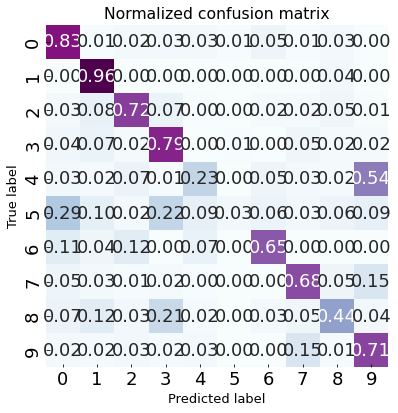

In [152]:
plt.figure(figsize=(7, 7))
sns.heatmap(norm_cm, square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu')
plt.rcParams["font.size"] = 13
plt.xlabel("Predicted label", fontsize=13)
plt.ylabel("True label", fontsize=13)
plt.title("Normalized confusion matrix")

In [4]:
path = "trained_model/20230110/intens/*"
files = glob.glob(path)
files.sort()

cm_list = []
for i, f in enumerate(files):
    model = tf.keras.models.load_model(f)
    pred_label = tf.argmax(model.predict(x_test), axis=-1).numpy()
    cm = tf.math.confusion_matrix(y_test, pred_label)
    label_tot = np.sum(cm, axis=1).reshape(-1, 1)
    norm_cm = cm / label_tot
    cm_list.append(norm_cm)

313/313 [==============================] - 4s 12ms/step


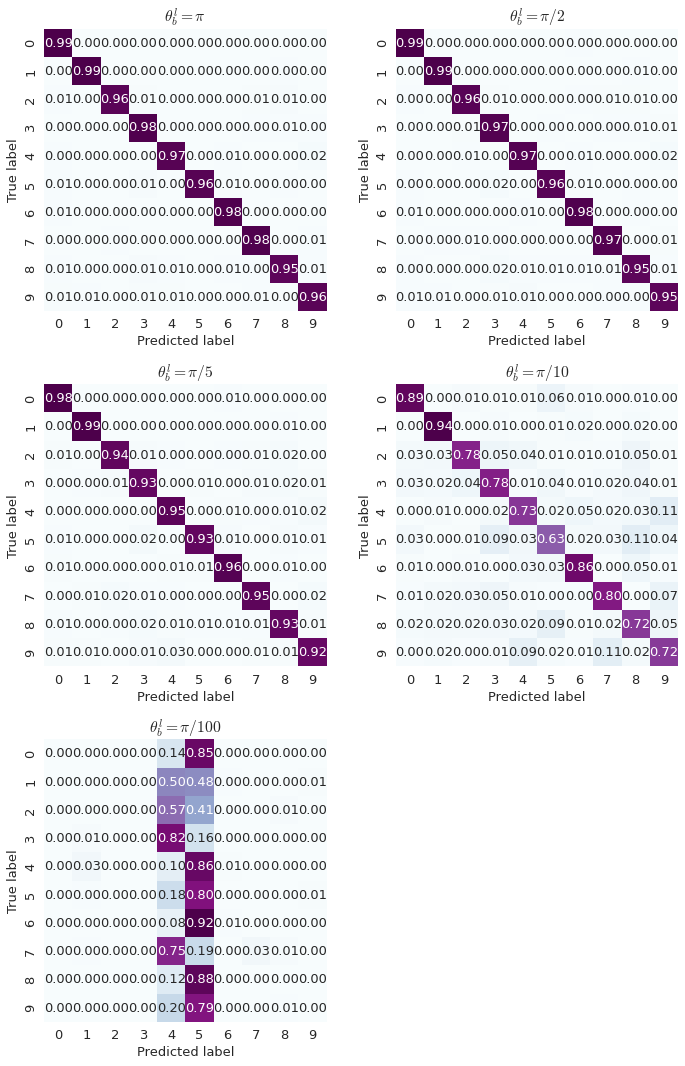

In [21]:
matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.size"] = 13
sns.set_style("white")
spines = 3

fig, axes = plt.subplots(3,2, figsize=(10,15))
sns.heatmap(cm_list[0], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[0,0], linecolor="black")
axes[0,0].set_title(r"$\theta^l_b = \pi$")
sns.heatmap(cm_list[1], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[0,1], linecolor="black")
axes[0,1].set_title(r"$\theta^l_b = \pi/2$")
sns.heatmap(cm_list[2], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[1,0], linecolor="black")
axes[1,0].set_title(r"$\theta^l_b = \pi/5$")
sns.heatmap(cm_list[3], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[1,1], linecolor="black")
axes[1,1].set_title(r"$\theta^l_b = \pi/10$")
sns.heatmap(cm_list[4], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[2,0], linecolor="black")
axes[2,0].set_title(r"$\theta^l_b = \pi/100$")
axes[2,1].set_visible(False)

for _ax in axes:
    for ax in _ax:
        ax.set_xlabel("Predicted label")
        ax.set_ylabel("True label")


fig.tight_layout()
fig.savefig("images/paper/intens_confusion.png", dpi=300)

In [22]:
path = "trained_model/20230110/intens_pol/*"
files = glob.glob(path)
files.sort()

cm_list = []
for i, f in enumerate(files):
    model = tf.keras.models.load_model(f)
    pred_label = tf.argmax(model.predict(x_test), axis=-1).numpy()
    cm = tf.math.confusion_matrix(y_test, pred_label)
    label_tot = np.sum(cm, axis=1).reshape(-1, 1)
    norm_cm = cm / label_tot
    cm_list.append(norm_cm)

313/313 [==============================] - 3s 9ms/step


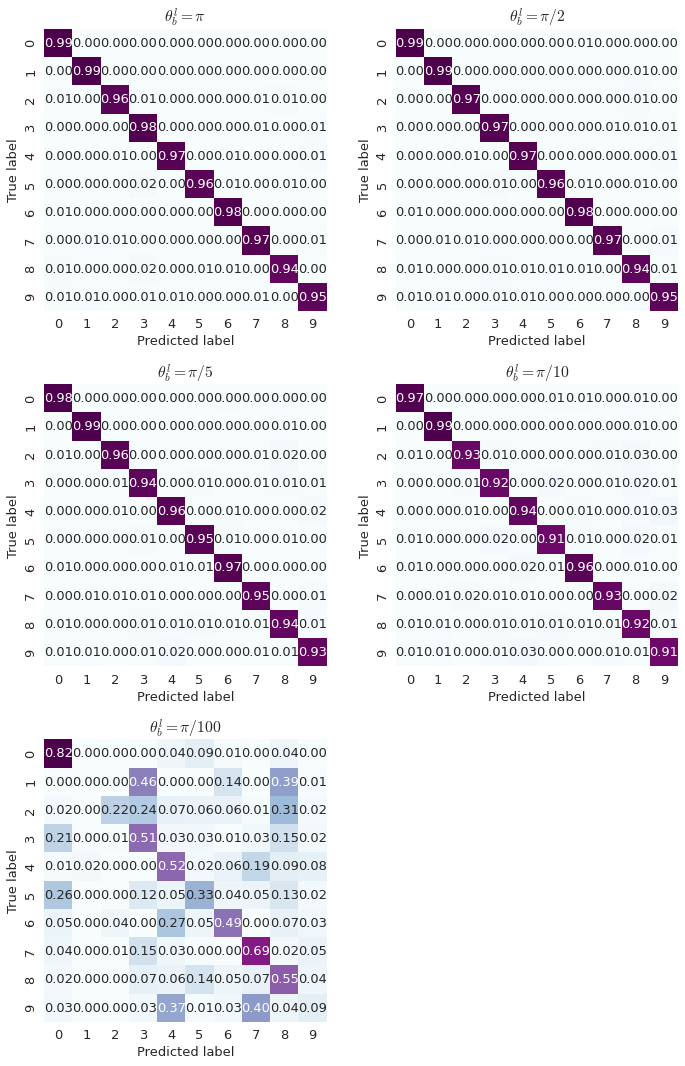

In [23]:
matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.size"] = 13
sns.set_style("white")
spines = 3

fig, axes = plt.subplots(3,2, figsize=(10,15))
sns.heatmap(cm_list[0], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[0,0], linecolor="black")
axes[0,0].set_title(r"$\theta^l_b = \pi$")
sns.heatmap(cm_list[1], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[0,1], linecolor="black")
axes[0,1].set_title(r"$\theta^l_b = \pi/2$")
sns.heatmap(cm_list[2], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[1,0], linecolor="black")
axes[1,0].set_title(r"$\theta^l_b = \pi/5$")
sns.heatmap(cm_list[3], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[1,1], linecolor="black")
axes[1,1].set_title(r"$\theta^l_b = \pi/10$")
sns.heatmap(cm_list[4], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[2,0], linecolor="black")
axes[2,0].set_title(r"$\theta^l_b = \pi/100$")
axes[2,1].set_visible(False)

for _ax in axes:
    for ax in _ax:
        ax.set_xlabel("Predicted label")
        ax.set_ylabel("True label")


fig.tight_layout()
fig.savefig("images/paper/intens_pol_confusion.png", dpi=300)

In [24]:
path = "trained_model/20230110/angle/*"
files = glob.glob(path)
files.sort()

cm_list = []
for i, f in enumerate(files):
    model = tf.keras.models.load_model(f)
    pred_label = tf.argmax(model.predict(x_test), axis=-1).numpy()
    cm = tf.math.confusion_matrix(y_test, pred_label)
    label_tot = np.sum(cm, axis=1).reshape(-1, 1)
    norm_cm = cm / label_tot
    cm_list.append(norm_cm)

313/313 [==============================] - 3s 9ms/step


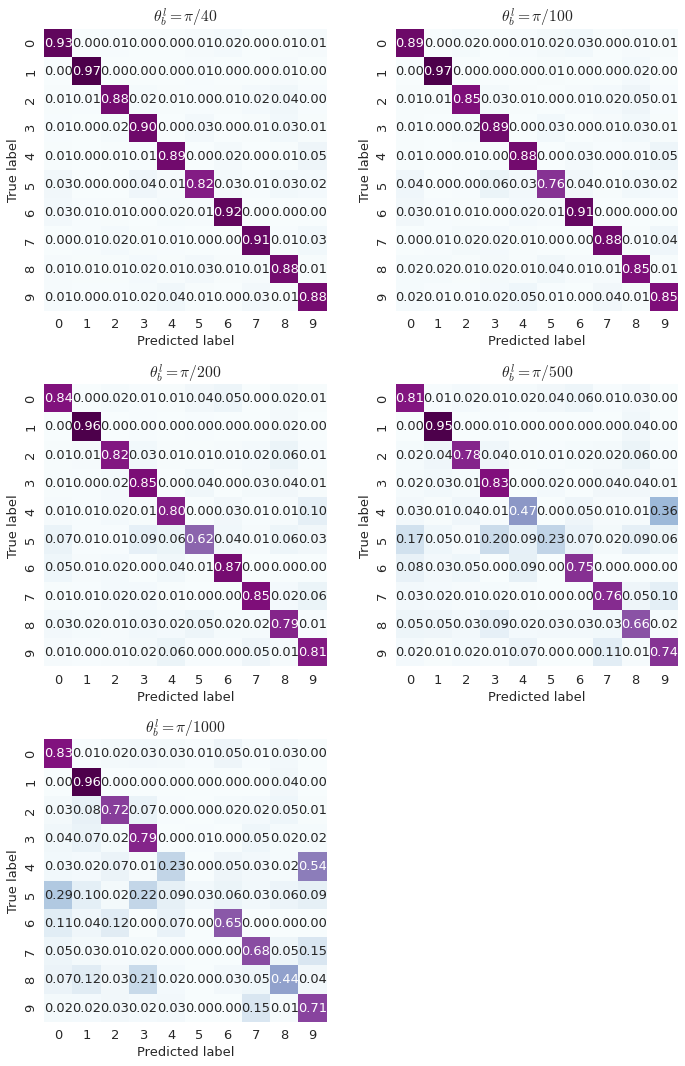

In [26]:
matplotlib_style.paper()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.size"] = 13
sns.set_style("white")
spines = 3

fig, axes = plt.subplots(3,2, figsize=(10,15))
sns.heatmap(cm_list[0], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[0,0], linecolor="black")
axes[0,0].set_title(r"$\theta^l_b = \pi/40$")
sns.heatmap(cm_list[1], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[0,1], linecolor="black")
axes[0,1].set_title(r"$\theta^l_b = \pi/100$")
sns.heatmap(cm_list[2], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[1,0], linecolor="black")
axes[1,0].set_title(r"$\theta^l_b = \pi/200$")
sns.heatmap(cm_list[3], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[1,1], linecolor="black")
axes[1,1].set_title(r"$\theta^l_b = \pi/500$")
sns.heatmap(cm_list[4], square=True, cbar=False, annot=True, fmt=".2f", cmap='BuPu', ax=axes[2,0], linecolor="black")
axes[2,0].set_title(r"$\theta^l_b = \pi/1000$")
axes[2,1].set_visible(False)

for _ax in axes:
    for ax in _ax:
        ax.set_xlabel("Predicted label")
        ax.set_ylabel("True label")


fig.tight_layout()
fig.savefig("images/paper/angle_confusion.png", dpi=300)

# 途中出力(光強度)

In [24]:
plt.rcParams["mathtext.fontset"] = "cm"

1/1 [==============================] - 0s 283ms/step


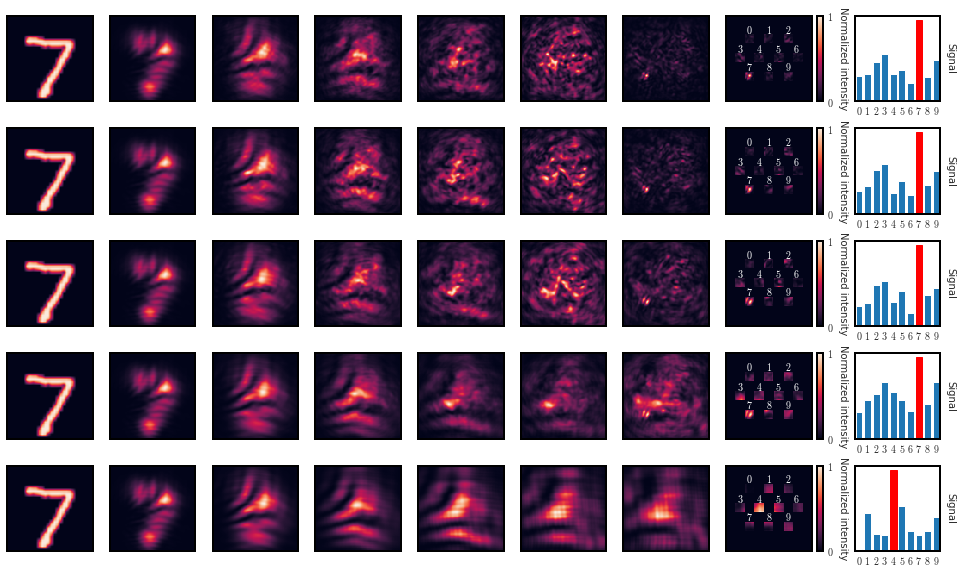

In [16]:
path = 'trained_model/20230110/intens/*'
files = glob.glob(path)
files.sort()

outputs_idx = [2, 3, 5, 7, 9, 11, 13]
fig, axes = plt.subplots(len(files), len(outputs_idx)+2, figsize=(18,10))
for j, path in enumerate(files):
    model = tf.keras.models.load_model(path)
    outputs_idx = [2, 3, 5, 7, 9, 11, 13]
    outputs = [ElectricFieldToIntensity((100, 100))(model.layers[i].output) for i in outputs_idx]

    hidden_outs_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
    hidden_pred = hidden_outs_model.predict(x_test[0:2, :, :])
    pred = model.predict(x_test[0:2, :, :])
    norm_pred = pred / np.max(pred, axis=1, keepdims=True)

    raw_outs_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
    raw_pred = raw_outs_model.predict(x_test[0:2,:,:])

    detector = MNISTDetector.from_config(model.layers[-2].get_config())
    detector.build((100, 100))
    mask = detector.get_photo_mask()

    for i in range(len(hidden_pred)):
        axes[j,i].imshow(hidden_pred[i][0,:,:] / np.max(hidden_pred[i][0,:,:]), vmin=0, vmax=1)
        axes[j,i].set_xticklabels([])
        axes[j,i].set_yticklabels([])

    axes[j,-2].imshow(hidden_pred[-1][0,:,:]*mask/ np.max(hidden_pred[-1][0,:,:]*mask), vmin=0, vmax=1)
    axes[j,-2].set_xticklabels([])
    axes[j,-2].set_yticklabels([])

    axes[j,-2].text(23,20, "$0$", color="white")
    axes[j,-2].text(46,20, "$1$", color="white")
    axes[j,-2].text(68,20, "$2$", color="white")
    axes[j,-2].text(12,43, "$3$", color="white")
    axes[j,-2].text(35,43, "$4$", color="white")
    axes[j,-2].text(56.5,43, "$5$", color="white")
    axes[j,-2].text(78,43, "$6$", color="white")
    axes[j,-2].text(23,64, "$7$", color="white")
    axes[j,-2].text(46,64, "$8$", color="white")
    axes[j,-2].text(68,64, "$9$", color="white")
    axes[j,-2].set_xticklabels([])
    axes[j,-2].set_yticklabels([])

    rect = axes[j,-1].bar(range(len(raw_pred[0,:])), raw_pred[0,:], align='center')
    max_idx = np.argmax(raw_pred[0,:])
    rect[max_idx].set_color("red")

    labels = list(np.arange(0,10,1))
    axes[j,-1].set_xticks(labels)
    axes[j,-1].set_xticklabels(["${:d}$".format(l) for l in labels])
    axes[j,-1].set_yticks([])
    axes[j,-1].set_yticklabels([])

    axes[j,-1].set_ylim(0, raw_pred[0,:][max_idx] * 1.05)

    ax_pos1 = axes[j,-2].get_position()
    ax_pos2 = axes[j,-1].get_position()
    axes[j,-1].set_position([ax_pos2.x0, ax_pos1.y0, ax_pos1.width, ax_pos1.height])

    cbar_ax = fig.add_axes([ax_pos1.x1+0.004, ax_pos1.y0, 0.005, ax_pos1.height])
    cbar = fig.colorbar(axes[j, -2].images[0], cax=cbar_ax)
    cbar.set_ticks([0,1])
    cbar.set_ticklabels(["$0$", "$1$"])
    cbar.set_label("Normalized intensity", rotation=270, labelpad=15)

    axes[j, -1].set_ylabel("Signal", rotation=270, labelpad=15)
    axes[j, -1].yaxis.set_label_position("right")

for ax in axes:
    ax_pos1 = ax[-1].get_position()
    ax[-1].set_position([ax_pos1.x0 + 0.02, ax_pos1.y0, ax_pos1.width, ax_pos1.height])

fig.savefig("out/paper/7/intens_hidden_out.png", dpi=300)

In [26]:
path = 'trained_model/20230110/intens/*'
files = glob.glob(path)
files.sort()
files

['trained_model/20230110/intens/0',
 'trained_model/20230110/intens/1',
 'trained_model/20230110/intens/2',
 'trained_model/20230110/intens/3',
 'trained_model/20230110/intens/4']

1/1 [==============================] - 0s 224ms/step


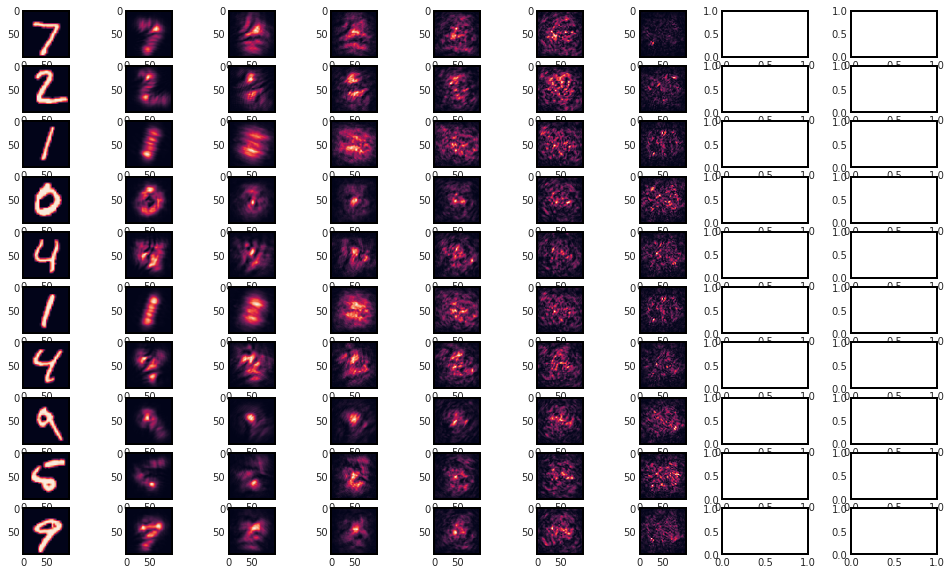

In [5]:
path = 'trained_model/20230110/intens/0'

outputs_idx = [2, 3, 5, 7, 9, 11, 13]
input_img = x_test[0:10,:,:]

fig, axes = plt.subplots(len(input_img), len(outputs_idx)+2, figsize=(18,10))
model = tf.keras.models.load_model(path)
outputs_idx = [2, 3, 5, 7, 9, 11, 13]
outputs = [ElectricFieldToIntensity((100, 100))(model.layers[i].output) for i in outputs_idx]

hidden_outs_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
hidden_pred = hidden_outs_model.predict(input_img)
pred = model.predict(input_img)
norm_pred = pred / np.max(pred, axis=1, keepdims=True)

raw_outs_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
raw_pred = raw_outs_model.predict(input_img)

detector = MNISTDetector.from_config(model.layers[-2].get_config())
detector.build((100, 100))
mask = detector.get_photo_mask()

for i in range(len(input_img)):
    for j in range(len(outputs_idx)):
        axes[i, j].imshow(hidden_pred[j][i,:,:])


#fig.savefig("out/paper/7/intens_hidden_out_inputs.png", dpi=300)

# 途中出力(検光子)

In [5]:
path = 'trained_model/20230110/intens_pol/*'
files = glob.glob(path)
files.sort()

list = []

for path in files:
    model = tf.keras.models.load_model(path)
    list.append(model.get_weights()[-1])

In [19]:
print([theta * 180 / np.pi for theta in list])

[-23.067676431059517, -27.270423308509887, -46.21287550919868, -65.84805061815204, -80.68359032563492]


1/1 [==============================] - 0s 393ms/step


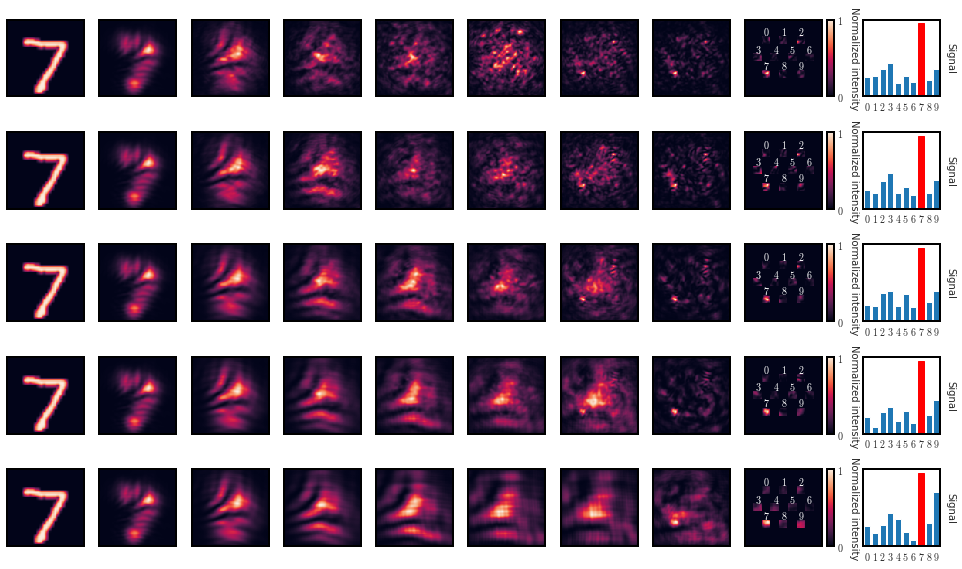

In [20]:
path = 'trained_model/20230110/intens_pol/*'
files = glob.glob(path)
files.sort()
plt.rcParams["mathtext.fontset"] = "cm"

outputs_idx = [2, 3, 5, 7, 9, 11, 13,14]
fig, axes = plt.subplots(len(files),  len(outputs_idx)+ 2, figsize=(18, 10))
for j, path in enumerate(files):
    model = tf.keras.models.load_model(path)
    outputs_idx = [2, 3, 5, 7, 9, 11, 13, 14]
    outputs = [ElectricFieldToIntensity((100, 100))(model.layers[i].output) for i in outputs_idx]

    hidden_outs_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
    hidden_pred = hidden_outs_model.predict(x_test[0:2, :, :])
    pred = model.predict(x_test[0:2, :, :])
    norm_pred = pred / np.max(pred, axis=1, keepdims=True)

    raw_outs_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
    raw_pred = raw_outs_model.predict(x_test[0:2, :, :])

    detector = MNISTDetector.from_config(model.layers[-2].get_config())
    detector.build((100, 100))
    mask = detector.get_photo_mask()

    for i in range(len(hidden_pred)):
        axes[j, i].imshow(hidden_pred[i][0, :, :]/np.max(hidden_pred[i][0, :, :]), vmin=0, vmax=1)
        axes[j, i].set_xticklabels([])
        axes[j, i].set_yticklabels([])

    axes[j, -2].imshow(hidden_pred[-1][0, :, :] * mask/np.max(hidden_pred[-1][0, :, :] * mask), vmin=0, vmax=1)
    axes[j, -2].set_xticklabels([])
    axes[j, -2].set_yticklabels([])

    axes[j, -2].text(23, 20, "$0$", color="white")
    axes[j, -2].text(46, 20, "$1$", color="white")
    axes[j, -2].text(68, 20, "$2$", color="white")
    axes[j, -2].text(12, 43, "$3$", color="white")
    axes[j, -2].text(35, 43, "$4$", color="white")
    axes[j, -2].text(56.5, 43, "$5$", color="white")
    axes[j, -2].text(78, 43, "$6$", color="white")
    axes[j, -2].text(23, 64, "$7$", color="white")
    axes[j, -2].text(46, 64, "$8$", color="white")
    axes[j, -2].text(68, 64, "$9$", color="white")
    axes[j, -2].set_xticklabels([])
    axes[j, -2].set_yticklabels([])

    rect = axes[j, -1].bar(range(len(raw_pred[0, :])), raw_pred[0, :], align='center')
    max_idx = np.argmax(raw_pred[0, :])
    rect[max_idx].set_color("red")

    labels = list(np.arange(0, 10, 1))
    axes[j, -1].set_xticks(labels)
    axes[j, -1].set_xticklabels(["${:d}$".format(l) for l in labels])
    axes[j, -1].set_yticks([])
    axes[j, -1].set_yticklabels([])

    axes[j, -1].set_ylim(0, raw_pred[0, :][max_idx] * 1.05)

    ax_pos1 = axes[j, -2].get_position()
    ax_pos2 = axes[j, -1].get_position()
    axes[j, -1].set_position([ax_pos2.x0, ax_pos1.y0, ax_pos1.width, ax_pos1.height])

    cbar_ax = fig.add_axes([ax_pos1.x1+0.004, ax_pos1.y0, 0.005, ax_pos1.height])
    cbar = fig.colorbar(axes[j, -2].images[0], cax=cbar_ax)

    cbar.set_ticks([0,1])
    cbar.set_ticklabels(["$0$", "$1$"])
    cbar.set_label("Normalized intensity", rotation=270, labelpad=15)

    axes[j, -1].set_ylabel("Signal", rotation=270, labelpad=15)
    axes[j, -1].yaxis.set_label_position("right")

for ax in axes:
    ax_pos1 = ax[-1].get_position()
    ax[-1].set_position([ax_pos1.x0 + 0.02, ax_pos1.y0, ax_pos1.width, ax_pos1.height])

fig.savefig("out/paper/7/intens_pol_hidden_out.png", dpi=300)

1/1 [==============================] - 0s 251ms/step


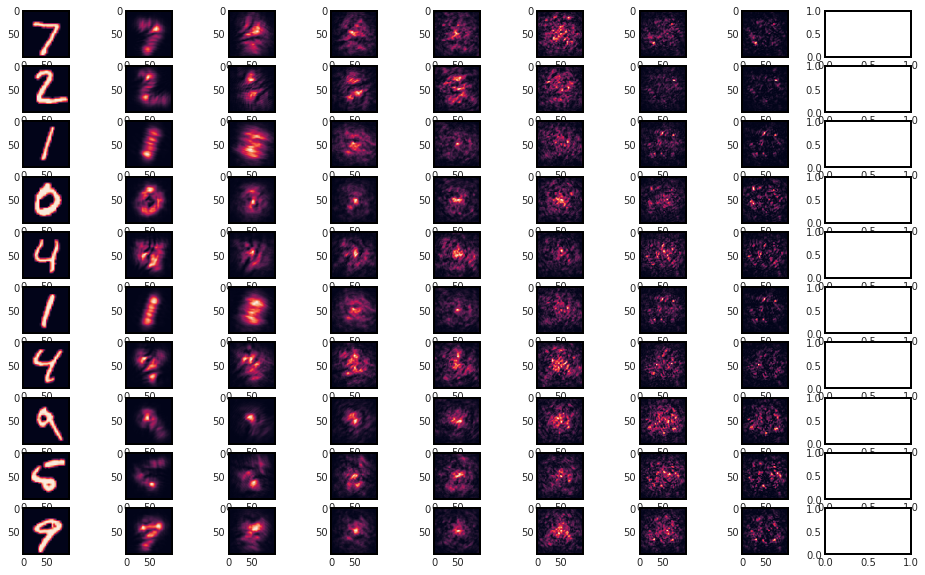

In [8]:
path = 'trained_model/20230110/intens_pol/0'

input_img = x_test[0:10,:,:]

fig, axes = plt.subplots(len(input_img), len(outputs_idx)+2, figsize=(18,10))
model = tf.keras.models.load_model(path)
outputs_idx = [2, 3, 5, 7, 9, 11, 13, 14]
outputs = [ElectricFieldToIntensity((100, 100))(model.layers[i].output) for i in outputs_idx]

hidden_outs_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
hidden_pred = hidden_outs_model.predict(input_img)
pred = model.predict(input_img)
norm_pred = pred / np.max(pred, axis=1, keepdims=True)

raw_outs_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
raw_pred = raw_outs_model.predict(input_img)

detector = MNISTDetector.from_config(model.layers[-2].get_config())
detector.build((100, 100))
mask = detector.get_photo_mask()

for i in range(len(input_img)):
    for j in range(len(outputs_idx)):
        axes[i, j].imshow(hidden_pred[j][i,:,:])


# 途中出力(偏光)

1/1 [==============================] - 0s 263ms/step


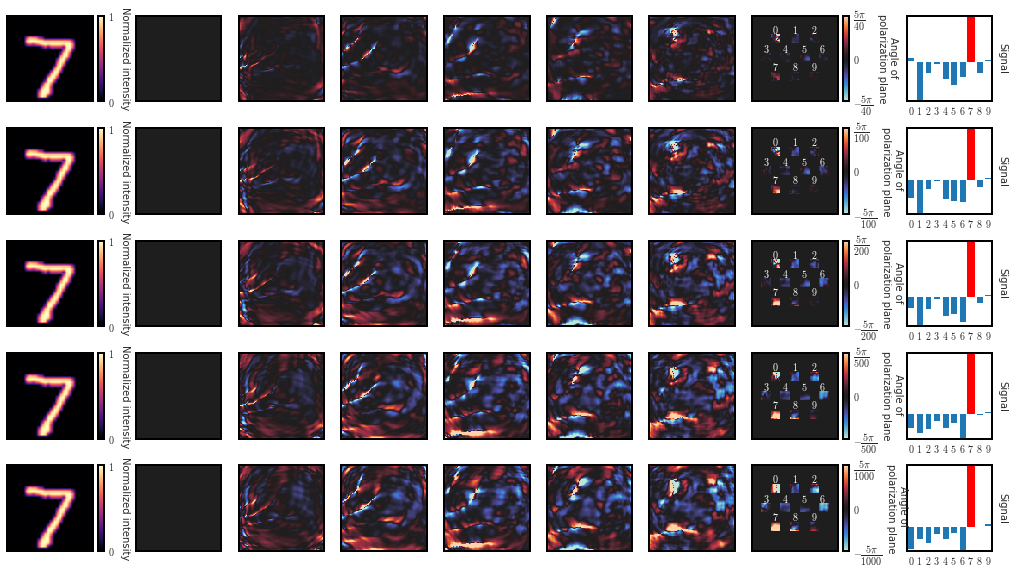

In [23]:
path = 'trained_model/20230110/angle/*'
files = glob.glob(path)
files.sort()

plt.rcParams["mathtext.fontset"] = "cm"

outputs_idx = [2, 3, 5, 7, 9, 11, 13]
theta = [np.pi/40, np.pi/100., np.pi/200., np.pi/500., np.pi/1000]
fig, axes = plt.subplots(len(files), len(outputs_idx) + 2, figsize=(18, 10))

for j, path in enumerate(files):
    model = tf.keras.models.load_model(path)
    outputs_idx = [2, 3, 5, 7, 9, 11, 13]
    outputs = [ElectricFieldToIntensity((100,100))(model.layers[i].output) if i == 2 else FaradayRotationByStokes((100, 100))(model.layers[i].output) for i in outputs_idx]

    hidden_outs_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
    hidden_pred = hidden_outs_model.predict(x_test[0:2, :, :])
    pred = model.predict(x_test[0:2, :, :])
    norm_pred = pred / np.max(pred, axis=1, keepdims=True)

    raw_outs_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
    raw_pred = raw_outs_model.predict(x_test[0:2, :, :])

    detector = MNISTDetector.from_config(model.layers[-2].get_config())
    detector.build((100, 100))
    mask = detector.get_photo_mask()

    for i in range(len(hidden_pred)):
        if i == 0:
            axes[j, i].imshow(hidden_pred[i][0, :, :], cmap="magma")
            axes[j, i].set_xticklabels([])
            axes[j, i].set_yticklabels([])
        else:
            axes[j, i].imshow(hidden_pred[i][0, :, :], vmin=-theta[j]*5, vmax=theta[j]*5, cmap=sns.color_palette("icefire", as_cmap=True))
            axes[j, i].set_xticklabels([])
            axes[j, i].set_yticklabels([])

    axes[j, -2].imshow(hidden_pred[-1][0, :, :] * mask, vmin=-theta[j]*5, vmax=theta[j]*5, cmap=sns.color_palette("icefire", as_cmap=True))
    axes[j, -2].set_xticklabels([])
    axes[j, -2].set_yticklabels([])

    axes[j, -2].text(23, 20, "$0$", color="white")
    axes[j, -2].text(46, 20, "$1$", color="white")
    axes[j, -2].text(68, 20, "$2$", color="white")
    axes[j, -2].text(12, 43, "$3$", color="white")
    axes[j, -2].text(35, 43, "$4$", color="white")
    axes[j, -2].text(56.5, 43, "$5$", color="white")
    axes[j, -2].text(78, 43, "$6$", color="white")
    axes[j, -2].text(23, 64, "$7$", color="white")
    axes[j, -2].text(46, 64, "$8$", color="white")
    axes[j, -2].text(68, 64, "$9$", color="white")
    axes[j, -2].set_xticklabels([])
    axes[j, -2].set_yticklabels([])

    rect = axes[j, -1].bar(range(len(raw_pred[0, :])), raw_pred[0, :], align='center')
    max_idx = np.argmax(raw_pred[0, :])
    rect[max_idx].set_color("red")

    labels = list(np.arange(0, 10, 1))
    axes[j, -1].set_xticks(labels)
    axes[j, -1].set_xticklabels(["${:d}$".format(l) for l in labels])
    axes[j, -1].set_yticks([])
    axes[j, -1].set_yticklabels([])

    #axes[j, -1].set_ylim(0, raw_pred[0, :][max_idx] * 1.05)

    ax_pos1 = axes[j, -2].get_position()
    ax_pos2 = axes[j, -1].get_position()
    axes[j, -1].set_position([ax_pos2.x0+0.02, ax_pos1.y0, ax_pos1.width, ax_pos1.height])

    cbar_ax = fig.add_axes([ax_pos1.x1+0.004, ax_pos1.y0, 0.005, ax_pos1.height])
    cbar = fig.colorbar(axes[j, -2].images[0], cax=cbar_ax, ticks=[-5*theta[j], 0, 5*theta[j]])
    cbar.set_ticklabels(["$-\dfrac{5\pi}{"+str(round(np.pi/theta[j])) + "}$", "$0$", "$\dfrac{5\pi}{"+str(round(np.pi/theta[j])) + "}$"])

    cbar.set_label("Angle of \npolarization plane", rotation=270, labelpad=25)


for ax in axes:
    ax_pos1 = ax[0].get_position()
    ax[0].set_position([ax_pos1.x0 - 0.02, ax_pos1.y0, ax_pos1.width, ax_pos1.height])
    ax_pos1 = ax[0].get_position()
    cbar_ax = fig.add_axes([ax_pos1.x1+0.004, ax_pos1.y0, 0.005, ax_pos1.height])
    cbar = fig.colorbar(ax[0].images[0], cax=cbar_ax, ticks=[0, 1])

    cbar.set_ticks([0,1])
    cbar.set_ticklabels(["$0$", "$1$"])
    cbar.set_label("Normalized intensity", rotation=270, labelpad=15)

    ax[-1].set_ylabel("Signal", rotation=270, labelpad=15)
    ax[-1].yaxis.set_label_position("right")

    ax_pos1 = ax[-1].get_position()
    ax[-1].set_position([ax_pos1.x0 + 0.02, ax_pos1.y0, ax_pos1.width, ax_pos1.height])

fig.savefig("out/paper/7/angle_hidden_out.png", dpi=300)

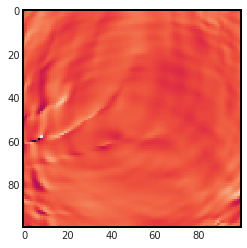

In [171]:
plt.imshow(hidden_pred[2][0,:,:])

In [177]:
outputs_idx = [2, 3, 5, 7, 9, 11, 13]
outputs = [model.layers[i].output for i in outputs_idx]

hidden_outs_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
hidden_pred = hidden_outs_model.predict(x_test[0:2, :, :])

1/1 [==============================] - 0s 236ms/step


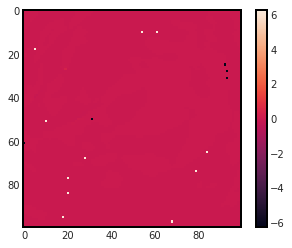

In [191]:
import numpy as np

theta =np.log(hidden_pred[3][0,0,:,:]).imag - np.log(hidden_pred[3][0,1,:,:]).imag

plt.imshow(theta)
plt.colorbar()

In [7]:
def create_model(**kwargs):
    shape = (100, 100)
    eta = 0.
    inputs = tf.keras.Input((28, 28))
    #@title デフォルトのタイトル テキスト
    wavelength = 633.0e-9 #@param {type:"number"}
    d = 1.0e-6 #@param {type:"number"}
    n = 1.5 #@param {type:"number"}
    z = 0.7e-3 #@param {type:"number"}
    x = ImageResizing(shape)(inputs)
    x = IntensityToElectricField(shape)(x)
    x = AngularSpectrum(shape, wavelength=wavelength, z=z, d=d, n=n, method='expand')(x)
    x = AngularSpectrum(shape, wavelength=wavelength, z=z, d=d, n=n, method='expand')(x)
    x = AngularSpectrum(shape, wavelength=wavelength, z=z, d=d, n=n, method='expand')(x)
    x = AngularSpectrum(shape, wavelength=wavelength, z=z, d=d, n=n, method='expand')(x)
    x = AngularSpectrum(shape, wavelength=wavelength, z=z, d=d, n=n, method='expand')(x)
    x = AngularSpectrum(shape, wavelength=wavelength, z=z, d=d, n=n, method='expand')(x)
    x = ElectricFieldToIntensity(shape)(x)
    model = tf.keras.Model(inputs, x)
    return model

In [8]:
model_brank = create_model()

1/1 [==============================] - 0s 288ms/step


/tmp/ipykernel_32/2198900668.py:9: RuntimeWarning: invalid value encountered in divide
  norm_pred = hidden_pred / np.max(hidden_pred, axis=1, keepdims=True)


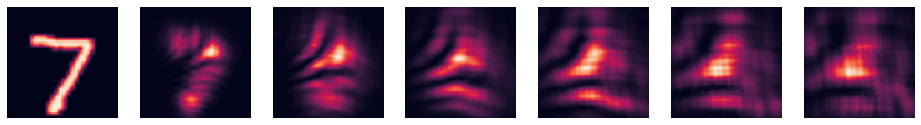

In [21]:
outputs_idx = [2, 3, 5, 7, 9, 11, 13,14]


outputs_idx = [2, 3, 4, 5, 6, 7, 8]
outputs = [ElectricFieldToIntensity((100, 100))(model_brank.layers[i].output) for i in outputs_idx]

hidden_outs_model = tf.keras.Model(inputs=model_brank.inputs, outputs=outputs)
hidden_pred = hidden_outs_model.predict(x_test[0:2, :, :])
norm_pred = hidden_pred / np.max(hidden_pred, axis=1, keepdims=True)


fig, axes = plt.subplots(1,  len(outputs_idx), figsize=(18, 10))
for i in range(len(outputs_idx)):
    axes[i].imshow(hidden_pred[i][0,:,:])
    axes[i].axis(False)


fig.savefig("out/paper/7/intens_pol_hidden_out_brank.png", dpi=300)